In [3]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from nltk import FreqDist
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
import warnings
warnings.filterwarnings("ignore")

# Text Processing-Removing stop words,Tokenization 

In [4]:
#function to remove  stopwords
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ''.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
    return removed_stop_words


def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = word_tokenize(review) 
    review = remove_stop_words(review) #remove stop words
    review = ' '.join(review)
    return review


# Count Vectorizer with ngrams

In [5]:
def CV_ngrams(X_train,X_test):
    count_vectorizer = CountVectorizer (binary=True, ngram_range=(1, 3))
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Count Vectorizer 

In [6]:
def Count_Vectorizer(X_train,X_test):
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(X)
    train_features_cv = count_vectorizer.transform(X_train)
    test_features_cv = count_vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# TF-IDF

In [7]:
def tfidf(X_train,X_test):    
    vectorizer = TfidfVectorizer ()
    vectorizer.fit(X)
    train_features_cv = vectorizer.transform(X_train)
    test_features_cv = vectorizer.transform(X_test)
    return train_features_cv,test_features_cv

# Confusion Matrix

In [8]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1,2] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 



In [9]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    

# DRUGLIB

In [24]:
#2.Reading data from a file path
drugLib_path = 'drugLib_raw.csv'
drugLib_data = pd.read_csv(drugLib_path)
for i in range(len(drugLib_data)):
    if((pd.isnull(drugLib_data.effectiveness[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffects[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.benefitsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.sideEffectsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i])
    elif((pd.isnull(drugLib_data.commentsReview[i])) == True):
        drugLib_data = drugLib_data.drop([i]) 
    elif((pd.isnull(drugLib_data.rating[i])) == True):
        drugLib_data = drugLib_data.drop([i]) 
        
drugLib_data['effectiveness_class'] = drugLib_data.effectiveness.apply(lambda x : 2 if x in ["Highly Effective","Considerably Effective"] else (1 if x in ["Moderately Effective " , "Marginally Effective"] else 0))
drugLib_data['sideEffects_class'] = drugLib_data.sideEffects.apply(lambda x : 0 if x in ["Extremely Severe Side Effects","Severe Side Effects"] else (1 if x in ["Mild Side Effects" , "Moderate Side Effects"] else 2))
drugLib_data['Total_Reviews'] = drugLib_data["benefitsReview"] + drugLib_data["sideEffectsReview"] + drugLib_data["commentsReview"]
drugLib_data['rating_label'] = drugLib_data.rating.apply(lambda x : 0 if x <= 4 else (1 if x in range(5,7) else 2))
drugLib_data.drop(["DrugID","urlDrugName","condition"],axis=1,inplace=True) 
# drugLib_data.drop(["DrugID","urlDrugName","condition","commentsReview","rating","effectiveness","sideEffects"],axis=1,inplace=True) 
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
print( "DrugLib Data")
print("Shape of drugLib data ",drugLib_data.shape)
drugLib_data.head()

DrugLib Data
Shape of drugLib data  (4133, 10)


,rating,effectiveness,sideEffects,benefitsReview,sideEffectsReview,commentsReview,effectiveness_class,sideEffects_class,Total_Reviews,rating_label
0,4,Highly Effective,Mild Side Effects,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",2,1,slowed the progression of left ventricular dys...,0
1,1,Highly Effective,Severe Side Effects,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",2,0,Although this type of birth control has more c...,0
2,10,Highly Effective,No Side Effects,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,2,2,I was used to having cramps so badly that they...,2
3,3,Marginally Effective,Mild Side Effects,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1,The acid reflux went away for a few months aft...,0
4,2,Marginally Effective,Severe Side Effects,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,0,I think that the Lyrica was starting to help w...,0


# effectiveness

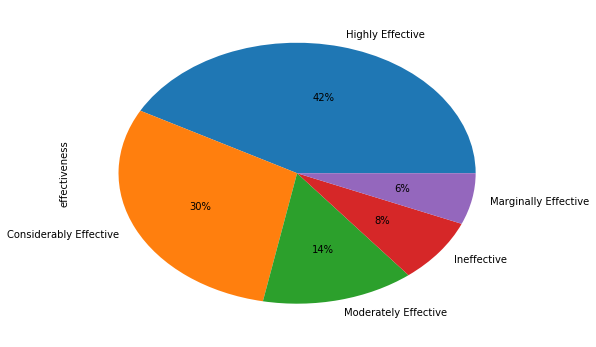

In [25]:
drugLib_data.effectiveness.value_counts().plot(kind='pie', autopct='%1.0f%%')

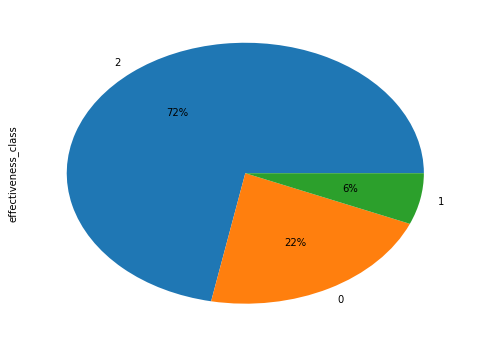

In [26]:
drugLib_data.effectiveness_class.value_counts().plot(kind='pie', autopct='%1.0f%%')

WordCloud for Highly effectiveness


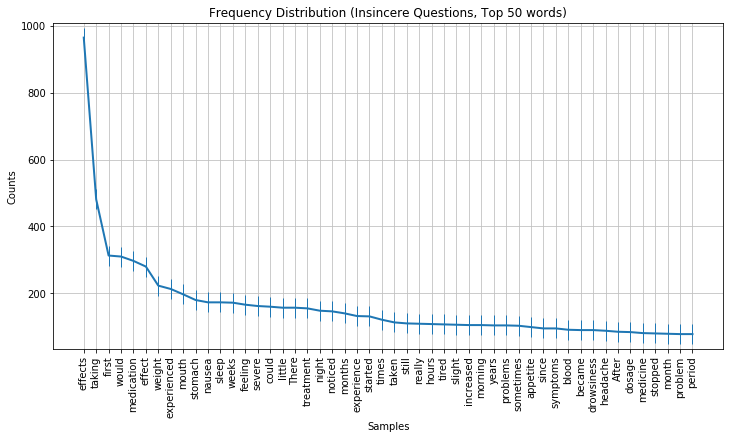

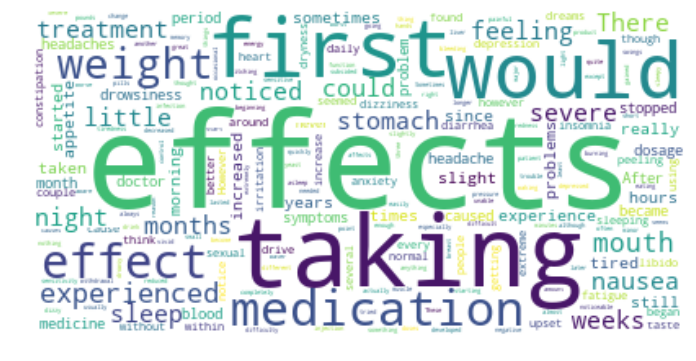

In [10]:
effectiveness = drugLib_data.loc[drugLib_data['effectiveness_class'] == 2].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[1]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for Highly effectiveness")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

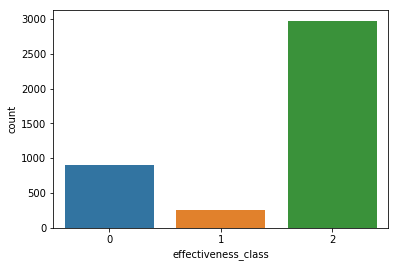

In [10]:
drugLib_data['effectiveness_clean_data'] = drugLib_data.benefitsReview.apply(clean_data)
X = drugLib_data["effectiveness_clean_data"].values
y = drugLib_data["effectiveness_class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)
sns.countplot(drugLib_data['effectiveness_class'],label="Count")
plt.show()

Count Vectorizer and KNN
Accuracy: 0.6266924564796905
              precision    recall  f1-score   support

           0       0.32      0.44      0.37       225
           1       0.16      0.08      0.10        65
           2       0.79      0.73      0.76       744

   micro avg       0.63      0.63      0.63      1034
   macro avg       0.42      0.42      0.41      1034
weighted avg       0.65      0.63      0.63      1034



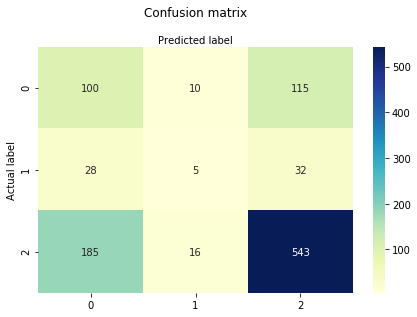

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.7253384912959381
              precision    recall  f1-score   support

           0       0.49      0.25      0.33       225
           1       0.25      0.08      0.12        65
           2       0.77      0.93      0.84       744

   micro avg       0.73      0.73      0.73      1034
   macro avg       0.50      0.42      0.43      1034
weighted avg       0.67      0.73      0.68      1034



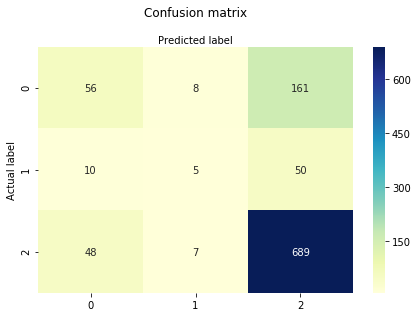

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.3568665377176016
              precision    recall  f1-score   support

           0       0.23      0.80      0.36       225
           1       0.14      0.08      0.10        65
           2       0.80      0.25      0.38       744

   micro avg       0.36      0.36      0.36      1034
   macro avg       0.39      0.37      0.28      1034
weighted avg       0.64      0.36      0.36      1034



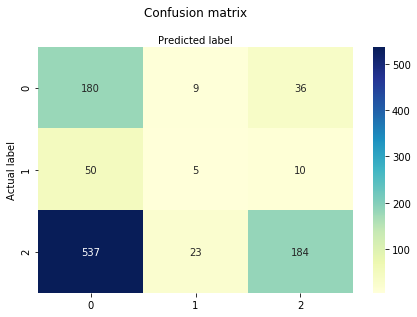

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7485493230174082
              precision    recall  f1-score   support

           0       0.55      0.33      0.41       225
           1       0.59      0.15      0.24        65
           2       0.78      0.93      0.85       744

   micro avg       0.75      0.75      0.75      1034
   macro avg       0.64      0.47      0.50      1034
weighted avg       0.72      0.75      0.72      1034



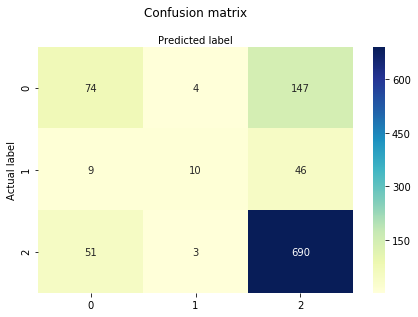

In [70]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.753384912959381
              precision    recall  f1-score   support

           0       0.83      0.17      0.28       225
           1       0.00      0.00      0.00        65
           2       0.75      1.00      0.86       744

   micro avg       0.75      0.75      0.75      1034
   macro avg       0.53      0.39      0.38      1034
weighted avg       0.72      0.75      0.68      1034



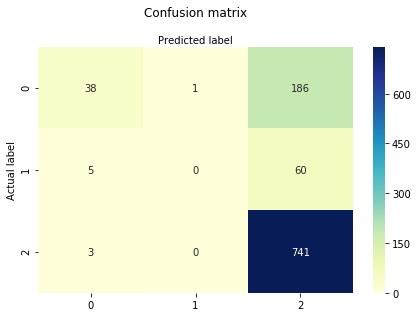

In [71]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7562862669245648
              precision    recall  f1-score   support

           0       0.62      0.28      0.39       225
           1       1.00      0.09      0.17        65
           2       0.77      0.96      0.85       744

   micro avg       0.76      0.76      0.76      1034
   macro avg       0.80      0.44      0.47      1034
weighted avg       0.75      0.76      0.71      1034



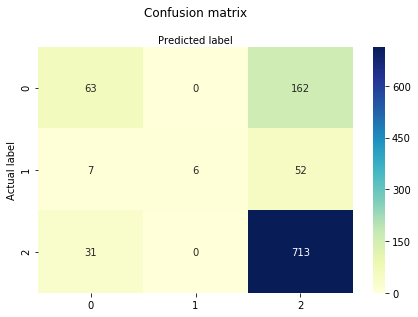

In [72]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.7495164410058027
              precision    recall  f1-score   support

           0       0.59      0.28      0.38       225
           1       0.37      0.11      0.17        65
           2       0.78      0.95      0.85       744

   micro avg       0.75      0.75      0.75      1034
   macro avg       0.58      0.45      0.47      1034
weighted avg       0.71      0.75      0.71      1034



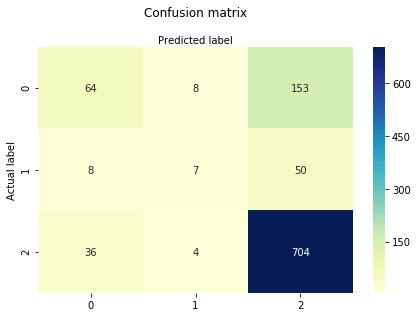

In [76]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.7553191489361702
              precision    recall  f1-score   support

           0       0.66      0.23      0.34       225
           1       0.48      0.15      0.23        65
           2       0.77      0.97      0.86       744

   micro avg       0.76      0.76      0.76      1034
   macro avg       0.64      0.45      0.48      1034
weighted avg       0.73      0.76      0.70      1034



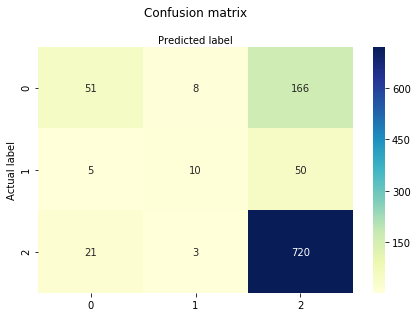

In [77]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.7514506769825918
              precision    recall  f1-score   support

           0       0.69      0.21      0.33       225
           1       0.67      0.06      0.11        65
           2       0.76      0.97      0.85       744

   micro avg       0.75      0.75      0.75      1034
   macro avg       0.70      0.42      0.43      1034
weighted avg       0.74      0.75      0.69      1034



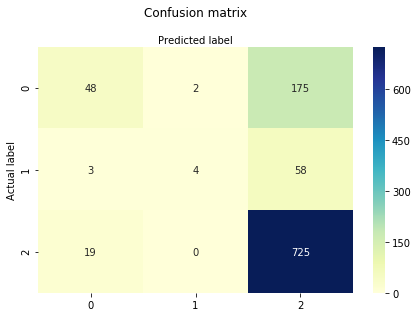

In [78]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.690522243713733
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       225
           1       0.25      0.17      0.20        65
           2       0.78      0.84      0.81       744

   micro avg       0.69      0.69      0.69      1034
   macro avg       0.48      0.45      0.46      1034
weighted avg       0.67      0.69      0.68      1034



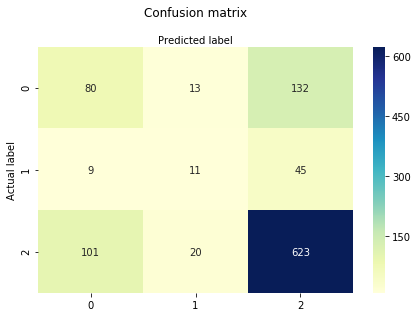

In [79]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.723404255319149
              precision    recall  f1-score   support

           0       0.49      0.33      0.40       225
           1       0.31      0.14      0.19        65
           2       0.78      0.89      0.83       744

   micro avg       0.72      0.72      0.72      1034
   macro avg       0.53      0.45      0.47      1034
weighted avg       0.69      0.72      0.70      1034



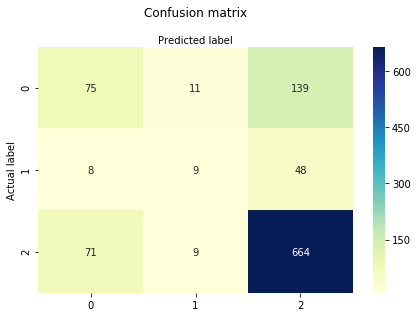

In [80]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Bagging
Accuracy: 0.7253384912959381
              precision    recall  f1-score   support

           0       0.51      0.28      0.36       225
           1       0.35      0.17      0.23        65
           2       0.77      0.91      0.83       744

   micro avg       0.73      0.73      0.73      1034
   macro avg       0.55      0.45      0.47      1034
weighted avg       0.69      0.73      0.69      1034



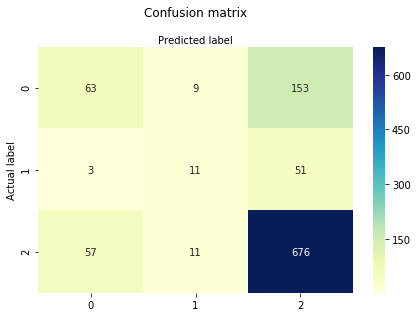

In [81]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv_ngrams, y_train)
y_pred=bag.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [11]:
#Word Embeddings
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
X_train, val_X, y_train, val_y = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1


W1113 14:28:32.502370 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1113 14:28:32.543857 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 14:28:32.551038 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 14:28:32.908111 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1113 14:28:32.934480 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anac

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           271264    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 458,267
Trainable params: 458,267
Non-trainable params: 0
_________________________________________________________________
None


W1113 14:28:34.057663 14048 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 2789 samples, validate on 310 samples
Epoch 1/10
2789/2789 [==============================] - 13s 5ms/step - loss: 0.8058 - acc: 0.7028 - val_loss: 0.7486 - val_acc: 0.7161
Epoch 2/10
2789/2789 [==============================] - 11s 4ms/step - loss: 0.7482 - acc: 0.7167 - val_loss: 0.7459 - val_acc: 0.7161
Epoch 3/10
2789/2789 [==============================] - 9s 3ms/step - loss: 0.7507 - acc: 0.7167 - val_loss: 0.7457 - val_acc: 0.7161
Epoch 4/10
2789/2789 [==============================] - 9s 3ms/step - loss: 0.7490 - acc: 0.7167 - val_loss: 0.7485 - val_acc: 0.7161
Epoch 5/10
2789/2789 [==============================] - 12s 4ms/step - loss: 0.7470 - acc: 0.7167 - val_loss: 0.7463 - val_acc: 0.7161
Epoch 6/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.7507 - acc: 0.7167 - val_loss: 0.7461 - val_acc: 0.7161
Epoch 7/10
2789/2789 [==============================] - 11s 4ms/step - loss: 0.7489 - acc: 0.7167 - val_loss: 0.7485 - val_acc: 0.7161
Epoch 8/10

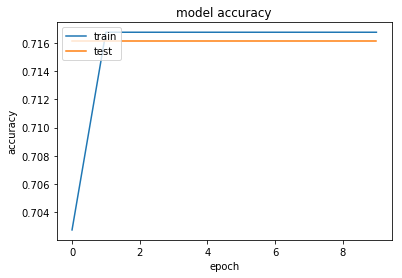

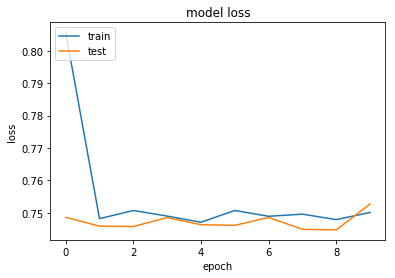

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 72.727273
1034/1034 [==============================] - 1s 589us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       214
           1       0.00      0.00      0.00        68
           2       0.73      1.00      0.84       752

   micro avg       0.73      0.73      0.73      1034
   macro avg       0.24      0.33      0.28      1034
weighted avg       0.53      0.73      0.61      1034
 samples avg       0.73      0.73      0.73      1034



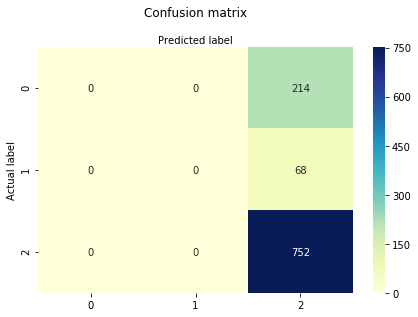

In [12]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train,y_train,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))
y_pred = model.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

W1113 12:34:22.903846  4692 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1113 12:34:22.932768  4692 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 12:34:22.939750  4692 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 12:34:23.308753  4692 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1113 12:34:23.315736  4692 deprecation.py:506

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          847700    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51  

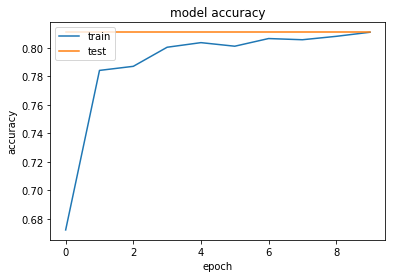

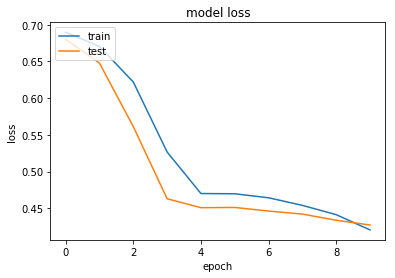

Word Embeddings and BiLSTM with adam optimiser
Test Accuracy: 81.818183
1034/1034 [==============================] - 1s 520us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       214
           1       0.00      0.00      0.00        68
           2       0.73      1.00      0.84       752

   micro avg       0.73      0.73      0.73      1034
   macro avg       0.24      0.33      0.28      1034
weighted avg       0.53      0.73      0.61      1034
 samples avg       0.73      0.73      0.73      1034



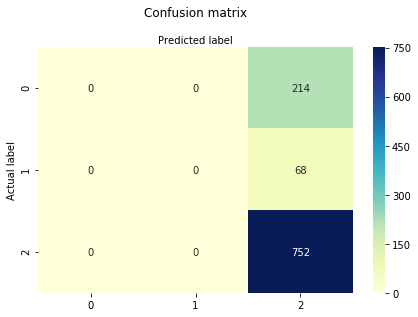

In [12]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_train,y_train, batch_size=512, epochs=10, validation_data=(val_X, val_y))
plotting(history)

loss, acc = model_biLSTM.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and BiLSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model_biLSTM.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

# sideeffects

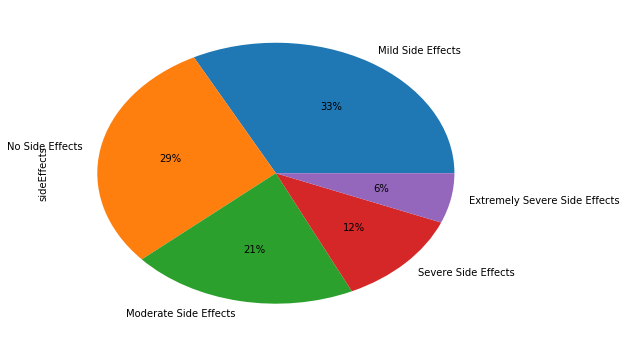

In [27]:
drugLib_data.sideEffects.value_counts().plot(kind='pie', autopct='%1.0f%%')

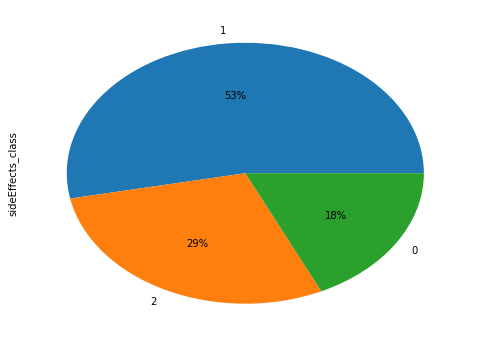

In [28]:
drugLib_data.sideEffects_class.value_counts().plot(kind='pie', autopct='%1.0f%%')

WordCloud for No sideeffects


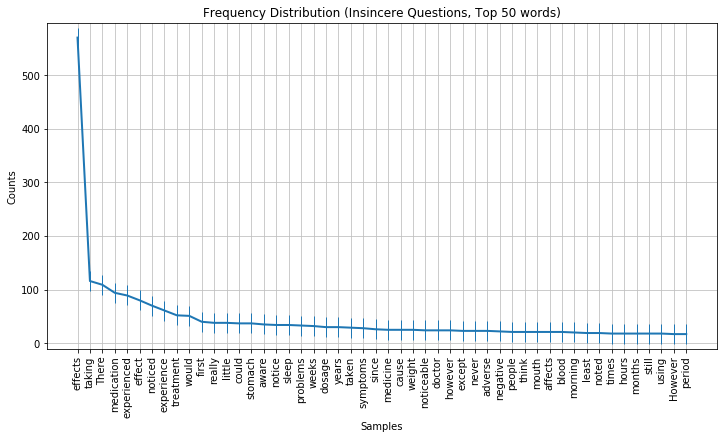

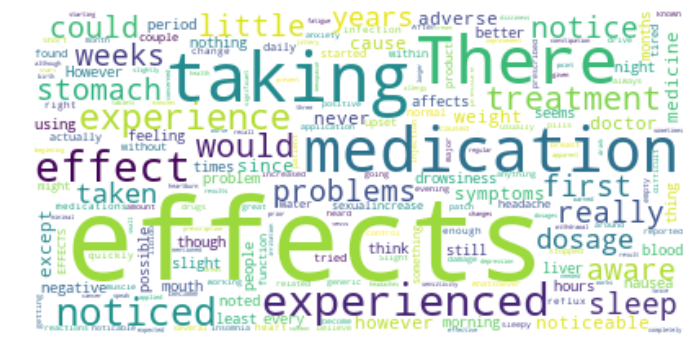

In [12]:
effectiveness = drugLib_data.loc[drugLib_data['sideEffects_class'] == 2].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[1]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for No sideeffects")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud for Extremely sideeffects


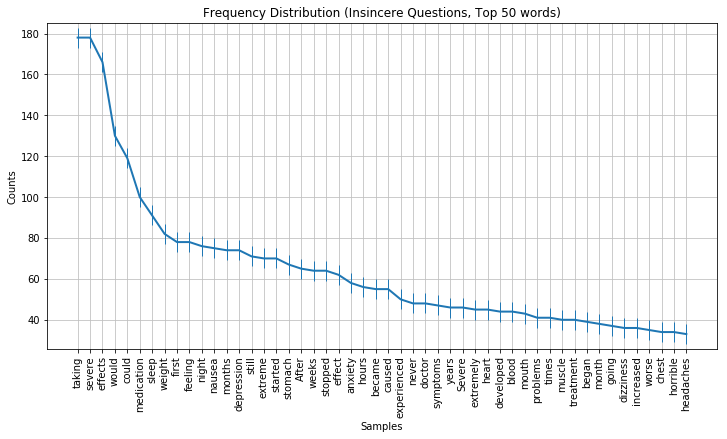

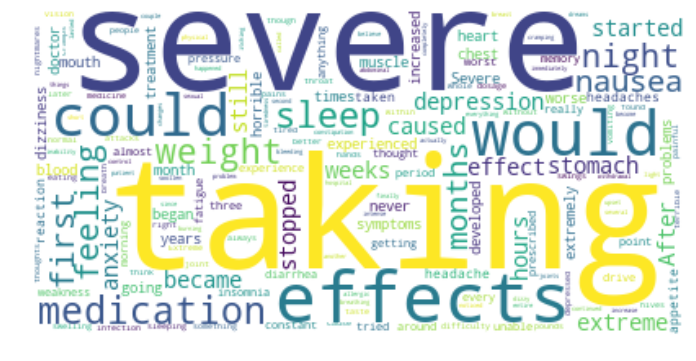

In [13]:
effectiveness = drugLib_data.loc[drugLib_data['sideEffects_class'] == 0].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[1]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for Extremely sideeffects")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

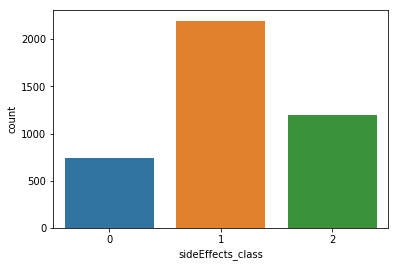

In [13]:
drugLib_data['side_effects_clean_data'] = drugLib_data.sideEffectsReview.apply(clean_data)
X = drugLib_data["side_effects_clean_data"].values
y = drugLib_data["sideEffects_class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)
sns.countplot(drugLib_data['sideEffects_class'],label="Count")
plt.show()

Count Vectorizer and KNN
Accuracy: 0.5880077369439072
              precision    recall  f1-score   support

           0       0.73      0.15      0.24       186
           1       0.71      0.56      0.62       549
           2       0.49      0.92      0.64       299

   micro avg       0.59      0.59      0.59      1034
   macro avg       0.64      0.54      0.50      1034
weighted avg       0.65      0.59      0.56      1034



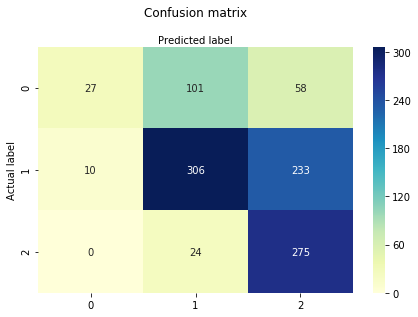

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.3452611218568665
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.82      0.12      0.20       549
           2       0.31      0.98      0.47       299

   micro avg       0.35      0.35      0.35      1034
   macro avg       0.38      0.37      0.22      1034
weighted avg       0.52      0.35      0.24      1034



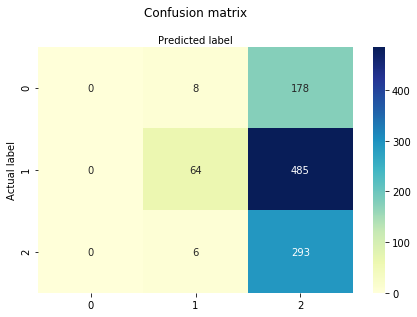

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.44197292069632493
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       186
           1       0.67      0.32      0.44       549
           2       0.36      0.93      0.52       299

   micro avg       0.44      0.44      0.44      1034
   macro avg       0.51      0.42      0.32      1034
weighted avg       0.55      0.44      0.38      1034



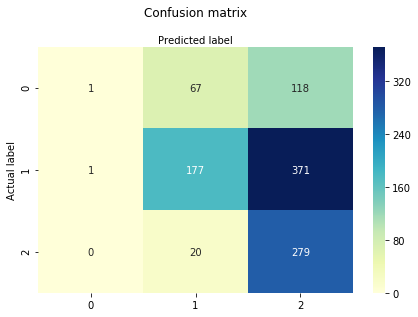

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7446808510638298
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       186
           1       0.75      0.83      0.78       549
           2       0.78      0.75      0.77       299

   micro avg       0.74      0.74      0.74      1034
   macro avg       0.73      0.69      0.71      1034
weighted avg       0.74      0.74      0.74      1034



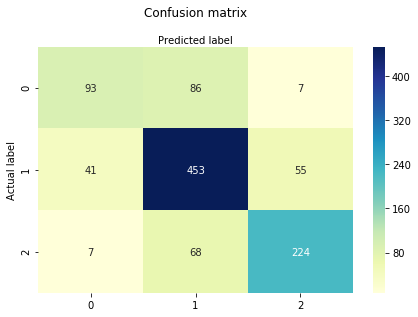

In [13]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.7591876208897486
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       186
           1       0.70      0.95      0.81       549
           2       0.92      0.69      0.79       299

   micro avg       0.76      0.76      0.76      1034
   macro avg       0.81      0.65      0.68      1034
weighted avg       0.79      0.76      0.74      1034



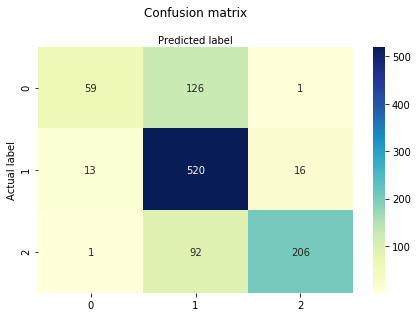

In [14]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7553191489361702
              precision    recall  f1-score   support

           0       0.78      0.39      0.52       186
           1       0.74      0.87      0.80       549
           2       0.78      0.78      0.78       299

   micro avg       0.76      0.76      0.76      1034
   macro avg       0.77      0.68      0.70      1034
weighted avg       0.76      0.76      0.74      1034



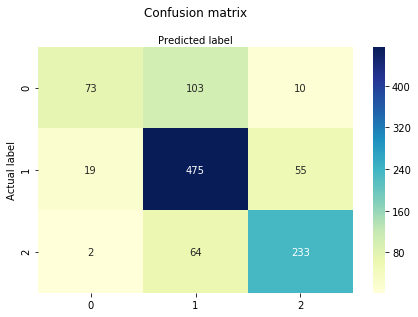

In [15]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.7224371373307543
              precision    recall  f1-score   support

           0       0.80      0.23      0.36       186
           1       0.69      0.89      0.77       549
           2       0.80      0.73      0.76       299

   micro avg       0.72      0.72      0.72      1034
   macro avg       0.76      0.61      0.63      1034
weighted avg       0.74      0.72      0.70      1034



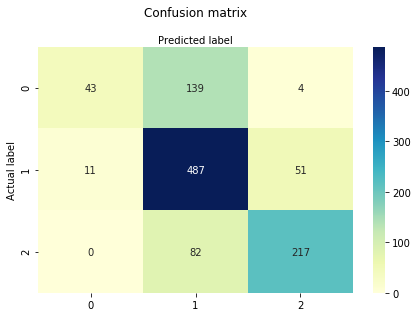

In [19]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.7350096711798839
              precision    recall  f1-score   support

           0       0.72      0.26      0.39       186
           1       0.70      0.91      0.79       549
           2       0.85      0.71      0.77       299

   micro avg       0.74      0.74      0.74      1034
   macro avg       0.75      0.63      0.65      1034
weighted avg       0.74      0.74      0.71      1034



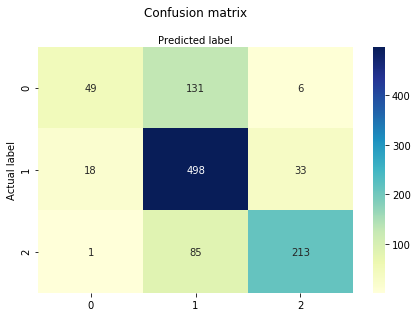

In [20]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.7030947775628626
              precision    recall  f1-score   support

           0       0.84      0.11      0.20       186
           1       0.69      0.87      0.76       549
           2       0.73      0.77      0.75       299

   micro avg       0.70      0.70      0.70      1034
   macro avg       0.75      0.58      0.57      1034
weighted avg       0.73      0.70      0.66      1034



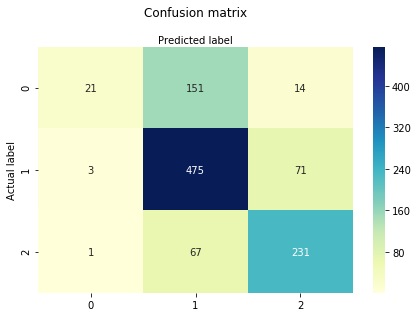

In [21]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.6856866537717602
              precision    recall  f1-score   support

           0       0.52      0.45      0.48       186
           1       0.73      0.73      0.73       549
           2       0.70      0.75      0.72       299

   micro avg       0.69      0.69      0.69      1034
   macro avg       0.65      0.64      0.65      1034
weighted avg       0.68      0.69      0.68      1034



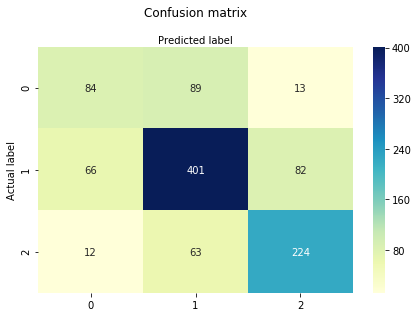

In [22]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.7127659574468085
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       186
           1       0.73      0.78      0.75       549
           2       0.76      0.72      0.74       299

   micro avg       0.71      0.71      0.71      1034
   macro avg       0.69      0.67      0.68      1034
weighted avg       0.71      0.71      0.71      1034



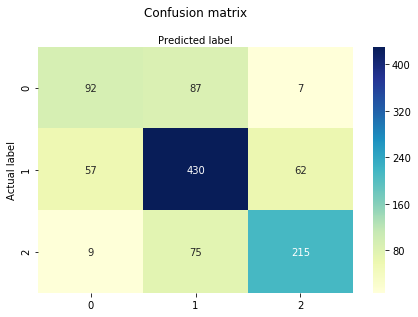

In [23]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Bagging
Accuracy: 0.7117988394584139
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       186
           1       0.73      0.78      0.75       549
           2       0.74      0.75      0.74       299

   micro avg       0.71      0.71      0.71      1034
   macro avg       0.68      0.66      0.67      1034
weighted avg       0.71      0.71      0.71      1034



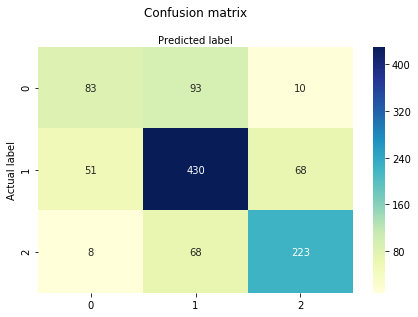

In [24]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv_ngrams, y_train)
y_pred=bag.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [14]:
#Word Embeddings
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
X_train, val_X, y_train, val_y = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           243648    
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 603       
Total params: 430,651
Trainable params: 430,651
Non-trainable params: 0
_________________________________________________________________
None
Train on 2789 samples, validate on 310 samples
Epoch 1/10
2789/2789 [==============================] - 11s 4ms/step - loss: 1.0271 - acc: 0.5138 - val_loss: 1.0051 - val_acc: 0.5258
Epoch 2/10
2789/2789 [==============================] - 10s 3ms/step - loss: 1.0079 - acc: 0.5256 - val_loss: 1.0118 - val_acc: 0.5258
Epoch 3/10
2789/2789 [==============================] - 

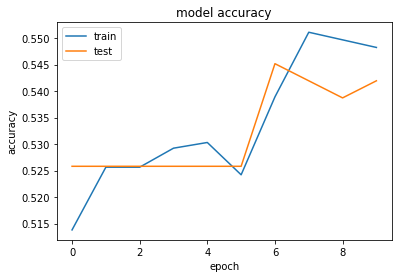

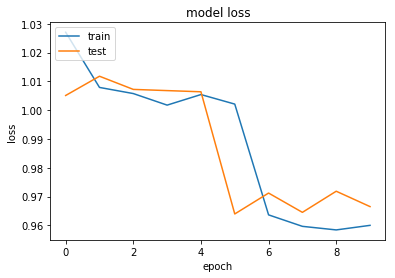

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 56.382979
1034/1034 [==============================] - 1s 554us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.55      1.00      0.71       566
           2       0.49      0.48      0.48       269

   micro avg       0.54      0.67      0.60      1034
   macro avg       0.35      0.49      0.40      1034
weighted avg       0.43      0.67      0.51      1034
 samples avg       0.56      0.67      0.59      1034



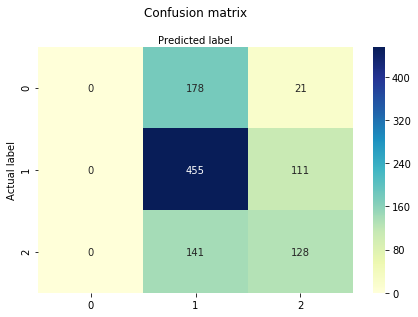

In [17]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train,y_train,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 100)          761400    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51  

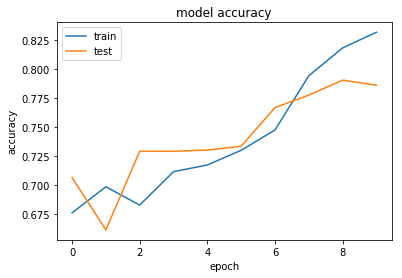

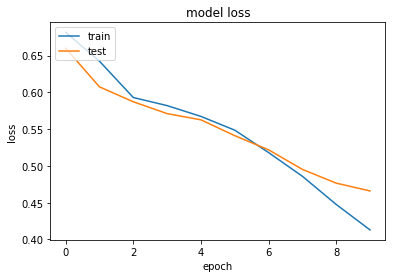

Word Embeddings and BiLSTM with adam optimiser
Test Accuracy: 79.851710
1034/1034 [==============================] - 1s 498us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.68      0.83      0.75       566
           2       0.82      0.77      0.80       269

   micro avg       0.72      0.65      0.68      1034
   macro avg       0.50      0.53      0.51      1034
weighted avg       0.59      0.65      0.62      1034
 samples avg       0.65      0.65      0.65      1034



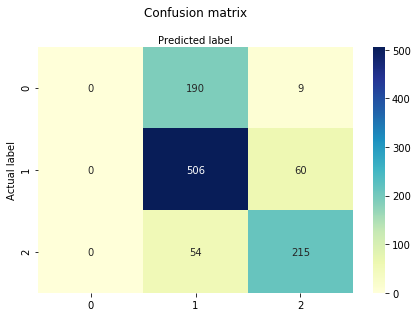

In [15]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_train,y_train, batch_size=512, epochs=10, validation_data=(val_X, val_y))
plotting(history)

loss, acc = model_biLSTM.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and BiLSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model_biLSTM.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

# Rating

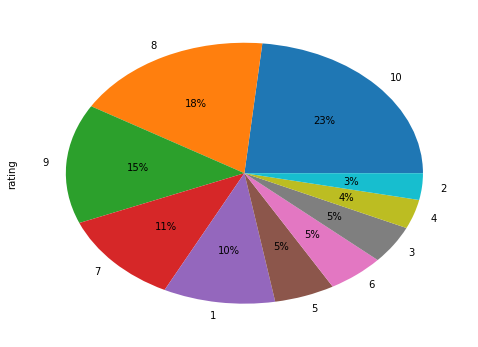

In [29]:
drugLib_data.rating.value_counts().plot(kind='pie', autopct='%1.0f%%')

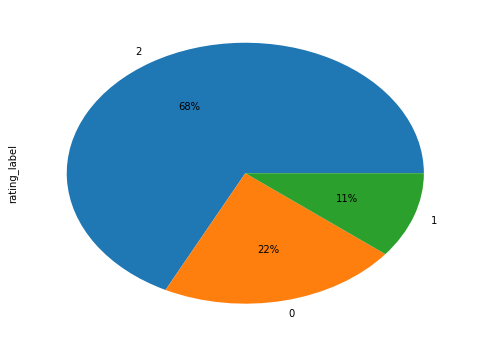

In [30]:
drugLib_data.rating_label.value_counts().plot(kind='pie', autopct='%1.0f%%')

WordCloud for rating >= 7


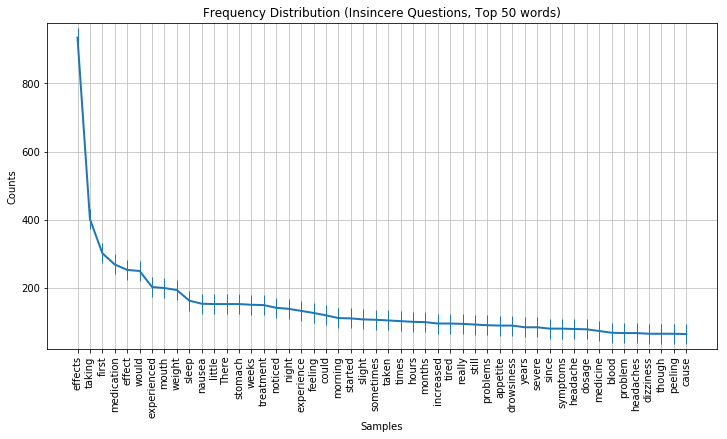

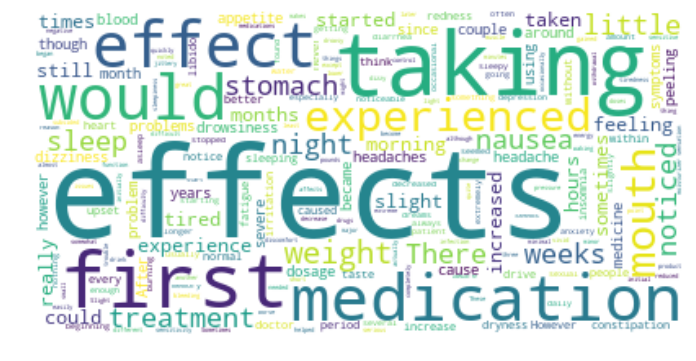

In [15]:
effectiveness = drugLib_data.loc[drugLib_data['rating_label'] == 2].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[1]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating >= 7")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud for rating <= 4


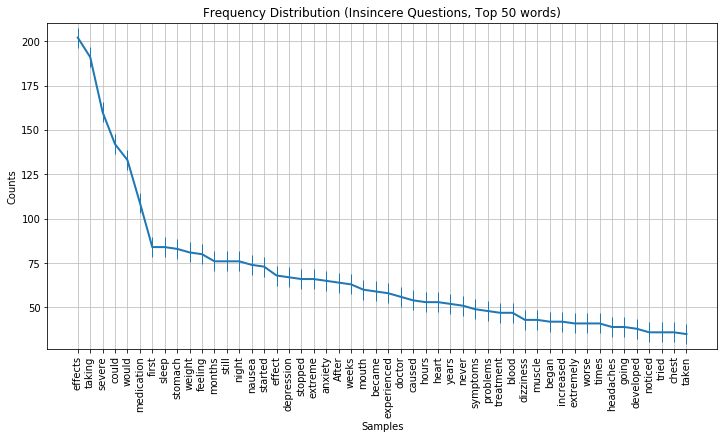

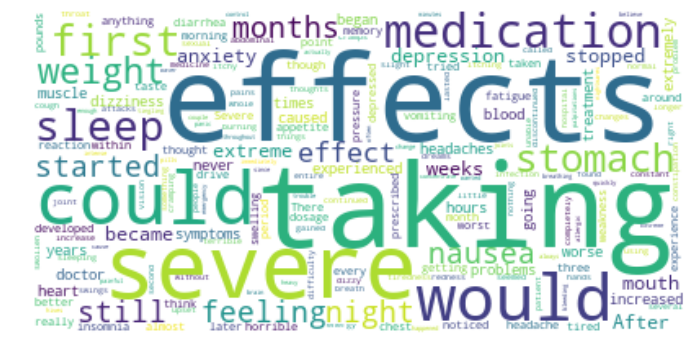

In [14]:
effectiveness = drugLib_data.loc[drugLib_data['rating_label'] == 0].values

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[1]) for question in effectiveness]

all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

print("WordCloud for rating <= 4")

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

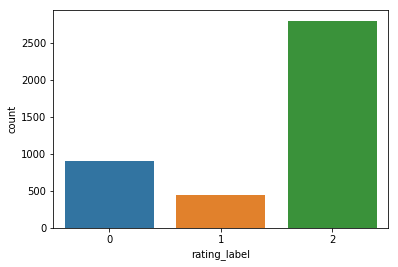

In [13]:
drugLib_data['rating_clean_data'] = drugLib_data.Total_Reviews.apply(clean_data)
X = drugLib_data["rating_clean_data"].values
y = drugLib_data["rating_label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
eff_train_X_tfidf ,eff_test_X_tfidf = tfidf(X_train,X_test)
eff_train_X_cv ,eff_test_X_cv = Count_Vectorizer(X_train,X_test)
eff_train_X_cv_ngrams ,eff_test_X_cv_ngrams = CV_ngrams(X_train,X_test)
sns.countplot(drugLib_data['rating_label'],label="Count")
plt.show()

Count Vectorizer and KNN
Accuracy: 0.5638297872340425
              precision    recall  f1-score   support

           0       0.41      0.07      0.11       225
           1       0.12      0.24      0.16       110
           2       0.70      0.78      0.73       699

   micro avg       0.56      0.56      0.56      1034
   macro avg       0.41      0.36      0.34      1034
weighted avg       0.57      0.56      0.54      1034



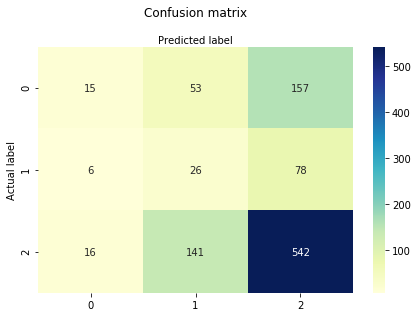

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv,y_train)
y_pred=knn.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFDIF and KNN
Accuracy: 0.6750483558994197
              precision    recall  f1-score   support

           0       0.48      0.24      0.32       225
           1       0.19      0.05      0.07       110
           2       0.71      0.91      0.80       699

   micro avg       0.68      0.68      0.68      1034
   macro avg       0.46      0.40      0.40      1034
weighted avg       0.61      0.68      0.62      1034



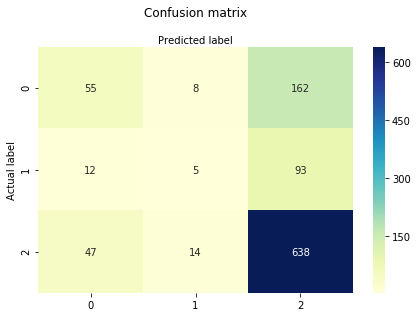

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_tfidf,y_train)
y_pred=knn.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFDIF and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and KNN
Accuracy: 0.6112185686653772
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.18      0.24      0.20       110
           2       0.68      0.87      0.76       699

   micro avg       0.61      0.61      0.61      1034
   macro avg       0.29      0.37      0.32      1034
weighted avg       0.48      0.61      0.54      1034



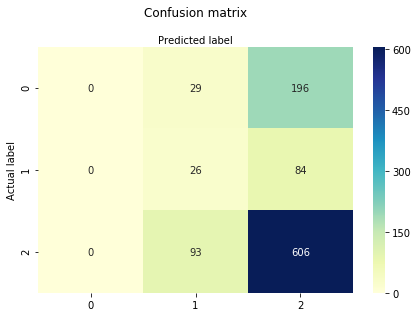

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eff_train_X_cv_ngrams,y_train)
y_pred=knn.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7350096711798839
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       225
           1       0.33      0.17      0.23       110
           2       0.79      0.87      0.83       699

   micro avg       0.74      0.74      0.74      1034
   macro avg       0.58      0.54      0.55      1034
weighted avg       0.71      0.74      0.72      1034



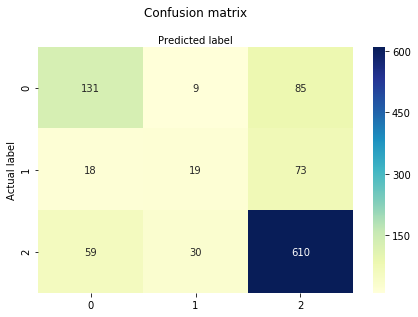

In [13]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv,y_train)
y_pred=logreg.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tfidf and Logistic Regression
Accuracy: 0.7127659574468085
              precision    recall  f1-score   support

           0       0.82      0.20      0.32       225
           1       0.00      0.00      0.00       110
           2       0.71      0.99      0.82       699

   micro avg       0.71      0.71      0.71      1034
   macro avg       0.51      0.40      0.38      1034
weighted avg       0.66      0.71      0.63      1034



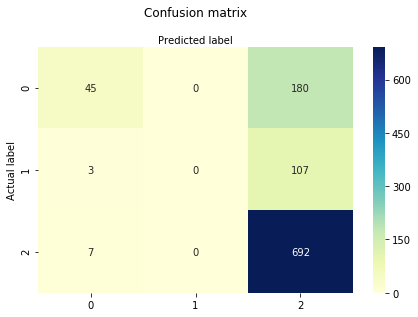

In [14]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_tfidf,y_train)
y_pred=logreg.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("tfidf and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Logistic Regression
Accuracy: 0.7611218568665378
              precision    recall  f1-score   support

           0       0.75      0.44      0.55       225
           1       1.00      0.09      0.17       110
           2       0.76      0.97      0.85       699

   micro avg       0.76      0.76      0.76      1034
   macro avg       0.84      0.50      0.52      1034
weighted avg       0.78      0.76      0.71      1034



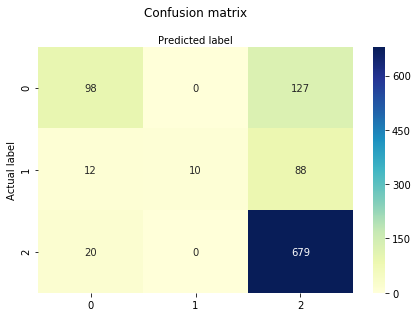

In [15]:
logreg = LogisticRegression()
logreg.fit(eff_train_X_cv_ngrams,y_train)
y_pred=logreg.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Logistic Regression")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Random Forest
Accuracy: 0.7079303675048356
              precision    recall  f1-score   support

           0       0.71      0.16      0.26       225
           1       0.90      0.08      0.15       110
           2       0.71      0.98      0.82       699

   micro avg       0.71      0.71      0.71      1034
   macro avg       0.77      0.41      0.41      1034
weighted avg       0.73      0.71      0.63      1034



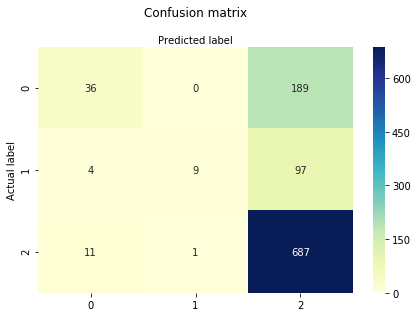

In [20]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv,y_train)
y_pred=forest.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Random Forest
Accuracy: 0.7021276595744681
              precision    recall  f1-score   support

           0       0.67      0.13      0.22       225
           1       0.90      0.08      0.15       110
           2       0.70      0.98      0.82       699

   micro avg       0.70      0.70      0.70      1034
   macro avg       0.76      0.40      0.40      1034
weighted avg       0.72      0.70      0.62      1034



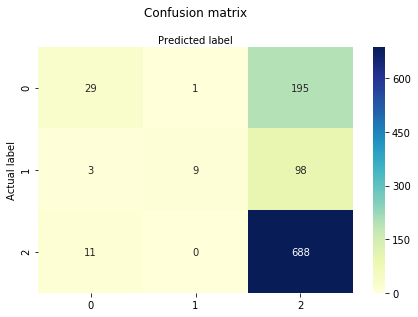

In [21]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_tfidf,y_train)
y_pred=forest.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Random Forest
Accuracy: 0.6982591876208898
              precision    recall  f1-score   support

           0       0.93      0.06      0.12       225
           1       1.00      0.08      0.15       110
           2       0.69      1.00      0.82       699

   micro avg       0.70      0.70      0.70      1034
   macro avg       0.88      0.38      0.36      1034
weighted avg       0.78      0.70      0.59      1034



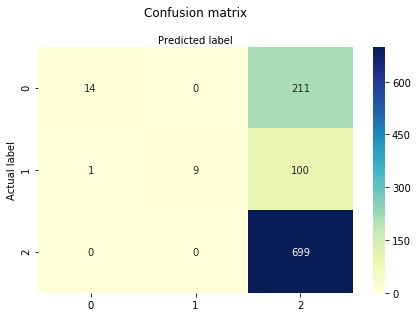

In [22]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(eff_train_X_cv_ngrams,y_train)
y_pred=forest.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Random Forest")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer and Bagging
Accuracy: 0.7156673114119922
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       225
           1       0.67      0.09      0.16       110
           2       0.74      0.92      0.82       699

   micro avg       0.72      0.72      0.72      1034
   macro avg       0.66      0.46      0.48      1034
weighted avg       0.70      0.72      0.67      1034



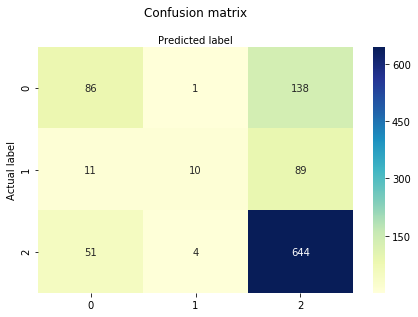

In [23]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv, y_train)
y_pred=bag.predict(eff_test_X_cv)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TFIDF and Bagging
Accuracy: 0.6750483558994197
              precision    recall  f1-score   support

           0       0.45      0.32      0.37       225
           1       0.42      0.10      0.16       110
           2       0.73      0.88      0.80       699

   micro avg       0.68      0.68      0.68      1034
   macro avg       0.53      0.43      0.44      1034
weighted avg       0.63      0.68      0.64      1034



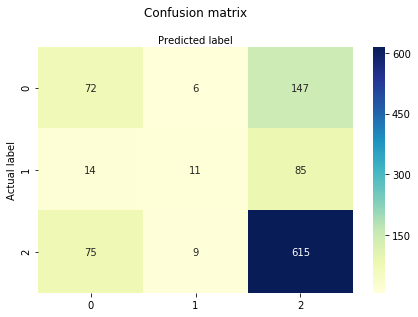

In [24]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_tfidf, y_train)
y_pred=bag.predict(eff_test_X_tfidf)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("TFIDF and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Count Vectorizer with n-grams and Bagging
Accuracy: 0.7108317214700194
              precision    recall  f1-score   support

           0       0.56      0.33      0.42       225
           1       0.82      0.08      0.15       110
           2       0.73      0.93      0.82       699

   micro avg       0.71      0.71      0.71      1034
   macro avg       0.70      0.45      0.46      1034
weighted avg       0.70      0.71      0.66      1034



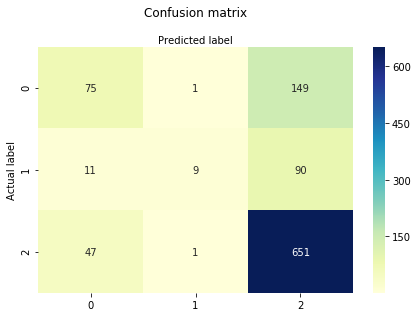

In [25]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(eff_train_X_cv_ngrams, y_train)
y_pred=bag.predict(eff_test_X_cv_ngrams)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)
print("Count Vectorizer with n-grams and Bagging")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [14]:
#Word Embeddings
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
X_train, val_X, y_train, val_y = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)
vocabulary_size = len(tk.word_counts.keys())+1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           535104    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603       
Total params: 722,107
Trainable params: 722,107
Non-trainable params: 0
_________________________________________________________________
None
Train on 2789 samples, validate on 310 samples
Epoch 1/10
2789/2789 [==============================] - 13s 5ms/step - loss: 0.8794 - acc: 0.6726 - val_loss: 0.8361 - val_acc: 0.6742
Epoch 2/10
2789/2789 [==============================] - 11s 4ms/step - loss: 0.8433 - acc: 0.6737 - val_loss: 0.8390 - val_acc: 0.6742
Epoch 3/10
2789/2789 [==============================] - 

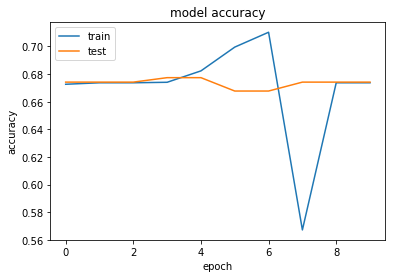

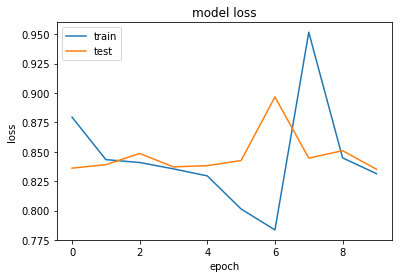

Word Embeddings and LSTM with adam optimiser
Test Accuracy: 68.375242
1034/1034 [==============================] - 0s 416us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.00      0.00      0.00       116
           2       0.68      1.00      0.81       707

   micro avg       0.68      0.68      0.68      1034
   macro avg       0.23      0.33      0.27      1034
weighted avg       0.47      0.68      0.56      1034
 samples avg       0.68      0.68      0.68      1034



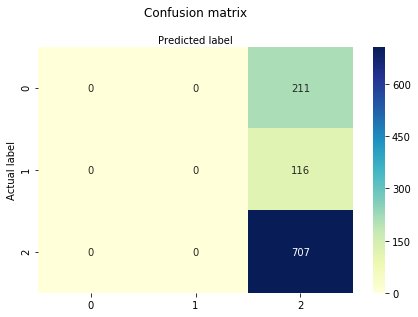

In [15]:
max_words = 100
embedding_size = 32
batch_size = 64
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train,y_train,batch_size = batch_size , epochs = 10,validation_data=(val_X, val_y))
plotting(history)
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and LSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 100)          1672200   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51  

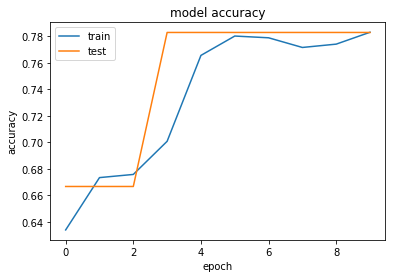

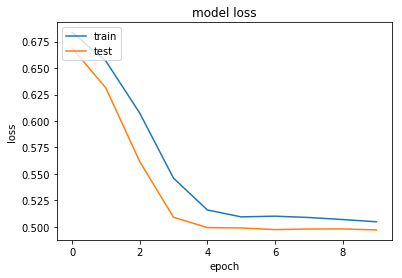

Word Embeddings and BiLSTM with adam optimiser
Test Accuracy: 78.916830
1034/1034 [==============================] - 1s 609us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.00      0.00      0.00       116
           2       0.68      1.00      0.81       707

   micro avg       0.68      0.68      0.68      1034
   macro avg       0.23      0.33      0.27      1034
weighted avg       0.47      0.68      0.56      1034
 samples avg       0.68      0.68      0.68      1034



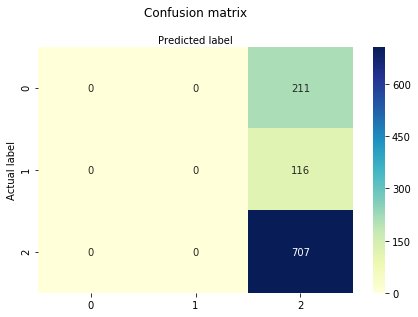

In [18]:
embed_size = 100
inp = Input(shape=(100,))
x = Embedding(vocabulary_size, embed_size)(inp)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model_biLSTM = Model(inputs=inp, outputs=x)
model_biLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_biLSTM.summary())
history = model_biLSTM.fit(X_train,y_train, batch_size=512, epochs=10, validation_data=(val_X, val_y))
plotting(history)

loss, acc = model_biLSTM.evaluate(X_test,y_test, verbose=0)
print("Word Embeddings and BiLSTM with adam optimiser")
print('Test Accuracy: %f' % (acc*100))

y_pred = model_biLSTM.predict([X_test], batch_size=1024, verbose=1)
print(classification_report(y_test, y_pred.round()))
cnf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confusion_matrix(cnf_matrix)